**Youth_Tobacco_Survey__YTS__Data**


This dataset was developed to provide states with comprehensive data on both middle school and high school students regarding tobacco use, exposure to environmental tobacco smoke, smoking cessation, school curriculum, minors' ability to purchase or otherwise obtain tobacco products, knowledge and attitudes about tobacco, and familiarity with pro-tobacco and anti-tobacco media messages. The dataset uses a two-stage cluster sample design to produce representative samples of students in middle schools (grades 6–8) and high schools (grades 9–12)

This dataset is valuable for data science due to its coverage of youth tobacco use over nearly two decades. Its rich demographic details and broad geographical spread enable researchers and policymakers to identify trends,
behaviors, and risk factors associated with tobacco use among the youth.




**Contents or Attributes**

YEAR - The year the data was collected

LocationAbbr - Abbreviation of the location (state, territory, etc.) where the data was collected

LocationDesc - Full name of the location (state, territory, etc.) where the data was collected

TopicType - The general category of the data (e.g., behavior, attitude)

TopicDesc - Description of the topic related to tobacco use (e.g., cigarette smoking, use of smokeless tobacco)

MeasureDesc - Specific measure being reported (e.g., prevalence, attempt to quit)

DataSource - The source of the data

Response - The response options for the survey question

Data_Value_Unit - The unit of measurement for the data values (e.g., percentage, number)

Data_Value_Type - The type of data value (e.g., Mean, Median)

Data_Value - The data value

Data_Value_Footnote_Symbol - Symbol for the footnote associated with the data value

Data_Value_Footnote - Description of the footnote associated with the data value

Data_Value_Std_Err - Standard error of the data value

Low_Confidence_Limit - The lower bound of the confidence interval for the data value

High_Confidence_Limit - The upper bound of the confidence interval for the data value

Sample_Size - The size of the sample for the data point

Gender - Gender of the respondents

Race - Race of the respondents

Age - Age or age group of the respondents

Education - Education level of the respondents

GeoLocation - Geographic coordinates (latitude, longitude) of the location

TopicTypeId - Identifier for the topic type

TopicId - Identifier for the specific topic

MeasureId - Identifier for the specific measure

StratificationID1 - Identifier for the first level of stratification

StratificationID2 - Identifier for the second level of stratification

StratificationID3 - Identifier for the third level of stratification

StratificationID4 - Identifier for the fourth level of stratification

SubMeasureID - Identifier for the sub-measure

DisplayOrder - A number indicating the order in which the data should be displayed


In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import mstats
!apt-get update
!apt-get install -y libgeos-dev
!pip install geopandas
!pip install geodatasets
!pip install pathlib
from pathlib import Path
# !pip install get_path
# import geopandas as gpd
# from pathlib import Path

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.9 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,303 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu 

In [2]:
# path_to_data = get_path("/content/drive/MyDrive/Youth_Tobacco_Survey__YTS__Data.csv")
# data = geopandas.read_file(path_to_data)
data = pd.read_csv('/content/drive/MyDrive/Youth_Tobacco_Survey__YTS__Data.csv')
pd.options.display.max_rows = 15000
pd.options.display.max_columns = 40
pd.set_option('display.max_colwidth', None)

In [3]:
data.ndim

2

In [4]:
data.shape

(10600, 31)

In [5]:
data.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age',
       'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [6]:
data.head(5)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,32.2,NaN,NaN,3.2,25.8,38.5,1377.0,Overall,All Races,All Ages,Middle School,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,47.8,NaN,NaN,2.9,42.1,53.5,654.0,Female,All Races,All Ages,High School,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,12.7,NaN,NaN,1.9,9.0,16.4,781.0,Male,All Races,All Ages,High School,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,28.5,NaN,NaN,2.2,24.2,32.8,1323.0,Overall,All Races,All Ages,Middle School,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,20.5,NaN,NaN,2.3,16.0,25.1,973.0,Male,All Races,All Ages,High School,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


**Getting a preliminary look at the data's format and content.**

In [7]:
data.dtypes

,0
YEAR,int64
LocationAbbr,object
LocationDesc,object
TopicType,object
TopicDesc,object
MeasureDesc,object
DataSource,object
Response,object
Data_Value_Unit,object
Data_Value_Type,object


In [8]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2               

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

**Using the info() method to identify null values and data types of attributes.**

In [10]:
data.describe()

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10600.000000,10080.000000,10080.000000,10083.000000,10080.000000,10080.000000,10600.000000
mean,2007.053491,20.336806,1.851429,16.715253,23.961806,1483.412897,8.106887
std,5.462656,21.168271,1.777441,18.575128,23.981915,2189.565233,3.076806
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.000000,0.600000,1.700000,4.300000,671.000000,7.000000
50%,2006.000000,10.550000,1.300000,7.900000,13.200000,1001.000000,9.000000
75%,2011.000000,36.425000,2.400000,29.600000,42.500000,1642.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


**Analyzing data distribution and summary statistics using the describe() method.**

In [11]:
data.describe(include = "all")

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
count,10600.000000,10600,10600,10600,10600,10600,10600,8190,10600,10600,10080.000000,517,517,10080.000000,10083.000000,10080.000000,10080.000000,10600,10600,10600,10600,10596,10600,10600,10600,10600,10600,10600,10600,10600,10600.000000
unique,NaN,50,50,1,3,4,2,3,1,1,NaN,1,1,NaN,NaN,NaN,NaN,3,1,1,2,50,1,3,4,3,1,1,2,12,NaN
top,NaN,MS,Mississippi,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,NaN,*,Data in these cells have been suppressed because of a small sample size,NaN,NaN,NaN,NaN,Overall,All Races,All Ages,Middle School,"(32.745510099, -89.538030825)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,NaN
freq,NaN,651,651,10600,4107,4107,10566,2730,10600,10600,NaN,517,517,NaN,NaN,NaN,NaN,3556,10600,10600,5633,651,10600,4107,4107,3556,10600,10600,5633,1377,NaN
mean,2007.053491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.336806,NaN,NaN,1.851429,16.715253,23.961806,1483.412897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.106887
std,5.462656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.168271,NaN,NaN,1.777441,18.575128,23.981915,2189.565233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.076806
min,1999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,0.600000,1.700000,4.300000,671.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
50%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.550000,NaN,NaN,1.300000,7.900000,13.200000,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
75%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.425000,NaN,NaN,2.400000,29.600000,42.500000,1642.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [12]:
print(data['Data_Value_Unit'].value_counts())
print(data['Data_Value_Type'].value_counts())
print(data['Race'].value_counts())
print(data['Age'].value_counts())
print(data['TopicTypeId'].value_counts())
print(data['DataSource'].value_counts())
print(data['Data_Value_Footnote_Symbol'].value_counts())
print(data['Data_Value_Footnote'].value_counts())
print(data['TopicId'].value_counts())
print(data['DataSource'].value_counts())
print(data['SubMeasureID'].value_counts())

Data_Value_Unit
%    10600
Name: count, dtype: int64
Data_Value_Type
Percentage    10600
Name: count, dtype: int64
Race
All Races    10600
Name: count, dtype: int64
Age
All Ages    10600
Name: count, dtype: int64
TopicTypeId
BEH    10600
Name: count, dtype: int64
DataSource
YTS     10566
NYTS       34
Name: count, dtype: int64
Data_Value_Footnote_Symbol
*    517
Name: count, dtype: int64
Data_Value_Footnote
Data in these cells have been suppressed because of a small sample size    517
Name: count, dtype: int64
TopicId
106BEH    4107
151BEH    4083
105BEH    2410
Name: count, dtype: int64
DataSource
YTS     10566
NYTS       34
Name: count, dtype: int64
SubMeasureID
YTS08    1377
YTS12    1365
YTS09    1365
YTS10    1365
YTS07    1365
YTS11    1353
YTS01     436
YTS03     424
YTS02     424
YTS04     390
YTS05     368
YTS06     368
Name: count, dtype: int64


**Analyzing the categories of attributes to gain deeper insights into the data.**

In [13]:
data['TopicDesc'].value_counts()

,count
TopicDesc,
Cigarette Use (Youth),4107
Smokeless Tobacco Use (Youth),4083
Cessation (Youth),2410


**Analyze the distribution of topics to identify the most common categories for future research or intervention strategies.**

In [14]:
print(data['StratificationID1'].value_counts())
print(data['StratificationID4'].value_counts())

StratificationID1
1GEN    3556
3GEN    3522
2GEN    3522
Name: count, dtype: int64
StratificationID4
1EDU    5633
2EDU    4967
Name: count, dtype: int64


In [15]:
data2 = data['Gender'].astype(str) + '-' + data['StratificationID1'].astype(str)
data2.value_counts()

,count
Overall-1GEN,3556
Female-3GEN,3522
Male-2GEN,3522


**✳ After concatenating the Gender and StratificationID1 columns, I determined that '1Gen' represents the overall population, '3GEN' represents Female, and '2GEN' represents Male. Therefore, I'm procceding keeping the Gender column and dropping the StratificationID1 column.**


In [16]:
data['Gen-Edu'] = data['Gender'].astype(str) + '-' + data['StratificationID4'].astype(str)

In [17]:
data['Gen-Edu'].value_counts()

,count
Gen-Edu,
Overall-1EDU,1889
Male-1EDU,1872
Female-1EDU,1872
Overall-2EDU,1667
Female-2EDU,1650
Male-2EDU,1650


**Merging the columns containing information on tobacco usage in family generations and educational attainment to gain deeper insights into the data.**

In [18]:
print(data['Response'].value_counts())
print(data['Response'].isnull().sum())

Response
Ever        2730
Frequent    2730
Current     2730
Name: count, dtype: int64
2410


**The 'Response' column is a significant attribute for understanding student tobacco usage patterns. As it contains over 20% missing values, simply dropping these rows would lead to substantial data loss. Instead, we'll explore the relationship between 'Response' and other attribute to develop effective imputation techniques.**

In [19]:
data['TopicDesc'].value_counts()

,count
TopicDesc,
Cigarette Use (Youth),4107
Smokeless Tobacco Use (Youth),4083
Cessation (Youth),2410


**Cessation is an end to something, such as the stopping of a bad habit, like the cessation of smoking.**

In [20]:
null_data =  data[data['Response'].isnull()]
null_data.head(20)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder,Gen-Edu
10,2015,LA,Louisiana,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigarette Smokers,YTS,NaN,%,Percentage,75.3,NaN,NaN,9.8,56.0,94.6,55.0,Overall,All Races,All Ages,Middle School,"(31.312660644, -92.445680071)",BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4,Overall-1EDU
15,2008,MN,Minnesota,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,NaN,*,Data in these cells have been suppressed because of a small sample size,NaN,NaN,NaN,NaN,Female,All Races,All Ages,Middle School,"(46.355648736, -94.794200503)",BEH,105BEH,170CES,3GEN,8AGE,6RAC,1EDU,YTS03,3,Female-1EDU
19,2011,NH,New Hampshire,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,41.2,NaN,NaN,4.0,33.4,49.0,185.0,Overall,All Races,All Ages,High School,"(43.655950113, -71.50036092)",BEH,105BEH,170CES,1GEN,8AGE,6RAC,2EDU,YTS01,1,Overall-2EDU
21,2005,IL,Illinois,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigarette Smokers,YTS,NaN,%,Percentage,45.5,NaN,NaN,2.7,40.3,50.7,144.0,Male,All Races,All Ages,High School,"(40.485010283, -88.997710178)",BEH,105BEH,169QUA,2GEN,8AGE,6RAC,2EDU,YTS05,5,Male-2EDU
25,2001,GA,Georgia,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigarette Smokers,YTS,NaN,%,Percentage,52.7,NaN,NaN,5.8,41.3,64.1,100.0,Female,All Races,All Ages,Middle School,"(32.839681093, -83.627580346)",BEH,105BEH,169QUA,3GEN,8AGE,6RAC,1EDU,YTS06,6,Female-1EDU
27,2004,IA,Iowa,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,42.9,NaN,NaN,4.6,34.0,51.9,85.0,Overall,All Races,All Ages,Middle School,"(42.469400913, -93.816490556)",BEH,105BEH,170CES,1GEN,8AGE,6RAC,1EDU,YTS01,1,Overall-1EDU
28,2009,NC,North Carolina,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,41.3,NaN,NaN,2.6,36.2,46.4,444.0,Overall,All Races,All Ages,High School,"(35.466220975, -79.159250463)",BEH,105BEH,170CES,1GEN,8AGE,6RAC,2EDU,YTS01,1,Overall-2EDU
34,2009,MS,Mississippi,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,49.1,NaN,NaN,4.4,40.4,57.8,146.0,Male,All Races,All Ages,High School,"(32.745510099, -89.538030825)",BEH,105BEH,170CES,2GEN,8AGE,6RAC,2EDU,YTS02,2,Male-2EDU
37,2002,NC,North Carolina,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigarette Smokers,YTS,NaN,%,Percentage,66.9,NaN,NaN,6.0,55.2,78.6,239.0,Female,All Races,All Ages,Middle School,"(35.466220975, -79.159250463)",BEH,105BEH,169QUA,3GEN,8AGE,6RAC,1EDU,YTS06,6,Female-1EDU
40,2003,UT,Utah,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,NaN,*,Data in these cells have been suppressed because of a small sample size,NaN,NaN,NaN,NaN,Male,All Races,All Ages,Middle School,"(39.360700171, -111.587130635)",BEH,105BEH,170CES,2GEN,8AGE,6RAC,1EDU,YTS02,2,Male-1EDU


In [21]:
null_data['TopicDesc'].value_counts().reset_index()

,TopicDesc,count
0,Cessation (Youth),2410


In [22]:
print(data['MeasureDesc'].value_counts().reset_index())
print(null_data['MeasureDesc'].value_counts().reset_index())

                                                 MeasureDesc  count
0                                             Smoking Status   4107
1                                                User Status   4083
2                Percent of Current Smokers Who Want to Quit   1284
3  Quit Attempt in Past Year Among Current Cigarette Smokers   1126
                                                 MeasureDesc  count
0                Percent of Current Smokers Who Want to Quit   1284
1  Quit Attempt in Past Year Among Current Cigarette Smokers   1126


In [23]:
raw_data = data[data['MeasureDesc'] == 'User Status']
raw_data2 = data[data['MeasureDesc'] == 'Smoking Status']

In [24]:
print(raw_data['Response'].value_counts().reset_index())
print(raw_data2['Response'].value_counts().reset_index())

   Response  count
0  Frequent   1365
1   Current   1365
2      Ever   1353
   Response  count
0      Ever   1377
1  Frequent   1365
2   Current   1365


**Analysis of the 'MeasureDesc' column revealed a strong association between'Percent of Current Smokers Who Want to Quit' and 'Quit Attempt in Past Year Among Current Cigarette Smokers' and the presence of missing 'Response' values.**

In [25]:
data.loc[(data['MeasureDesc'] == 'Percent of Current Smokers Who Want to Quit') , 'Response'] = "Want to Quit"
data.loc[(data['MeasureDesc'] == 'Quit Attempt in Past Year Among Current Cigarette Smokers') , 'Response'] = "Tried to Quiet"
data['Response'].value_counts()

,count
Response,
Ever,2730
Frequent,2730
Current,2730
Want to Quit,1284
Tried to Quiet,1126


**Impute missing 'Response' values based on 'MeasureDesc' patterns.For rows where 'MeasureDesc' indicates a desire to quit smoking, the 'Response' is imputed as 'Want to Quit'.For rows where 'MeasureDesc' indicates a past quit attempt, the 'Response' is imputed as 'Tried to Quit'.**

In [26]:
data = data.drop(['Data_Value_Unit' , 'MeasureDesc' , 'Data_Value_Type' , 'Race' , 'StratificationID1' ,'Age' ,'Data_Value' , 'Data_Value_Std_Err' , 'Sample_Size' , 'SubMeasureID' , 'DataSource' , 'TopicTypeId' , 'StratificationID3', 'StratificationID1' , 'TopicId' , 'StratificationID2' , 'TopicType' ,'StratificationID4' , 'LocationAbbr' , 'MeasureId' , 'Data_Value_Footnote_Symbol' , 'Data_Value_Footnote' , "DisplayOrder"] , axis = 1)

**Removing columns that offer little or no predictive value for the target variable. This includes columns with:**

- Only one unique value (constant values), such as `Data_Value_Unit`, `Data_Value_Type`, `Race`, `Age`, and `TopicTypeId`
- Limited variability
- No apparent relationship with the target variable
- Attributes that contain the same information ,  Keep the attribute that is more relevant to the dataset if they contain the same information, such as retaining the Gender attribute instead of StratificationID1.

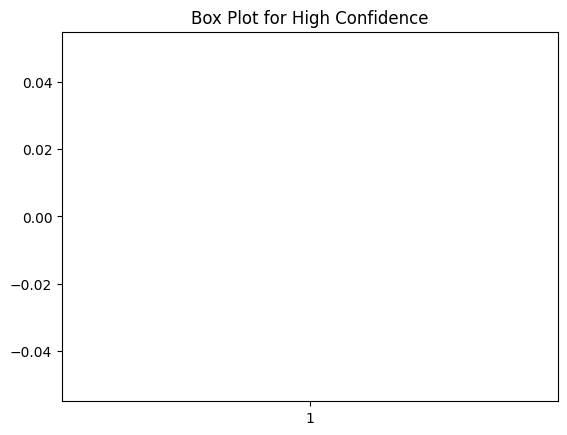

In [27]:
plt.boxplot(x = data['High_Confidence_Limit'] , patch_artist = True ,  boxprops = dict(facecolor = '#01fbff' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for High Confidence')
plt.show()

**Outlier detection was performed on the 'High_Confidence_Limit' column to identify and potentially handle extreme values, which can significantly impact data analysis and the accuracy of subsequent imputation methods.**

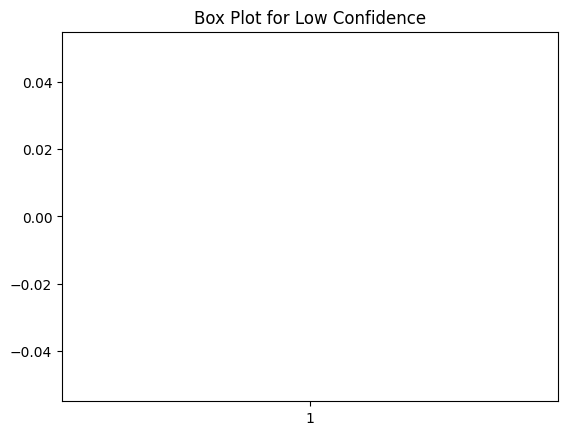

In [28]:
plt.boxplot(x = data['Low_Confidence_Limit'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , linewidth = 2) , medianprops = dict( color = 'black' , linewidth = 2))
plt.title('Box Plot for Low Confidence')
plt.show()

**Outlier detection was performed on the 'High_Confidence_Limit' column to identify and potentially handle extreme values, which can significantly impact data analysis and the accuracy of subsequent imputation methods.**

In [29]:
# data['High_Confidence_Limit'] = mstats.winsorize(data['High_Confidence_Limit'] , limits = [0.00 , 0.01])
# data['Low_Confidence_Limit'] = mstats.winsorize(data['Low_Confidence_Limit'] , limits = [0.00 , 0.01])

**Removing the outliers**

In [30]:
print(data['Low_Confidence_Limit'].isnull().sum())
print(data['High_Confidence_Limit'].isnull().sum())

517
520


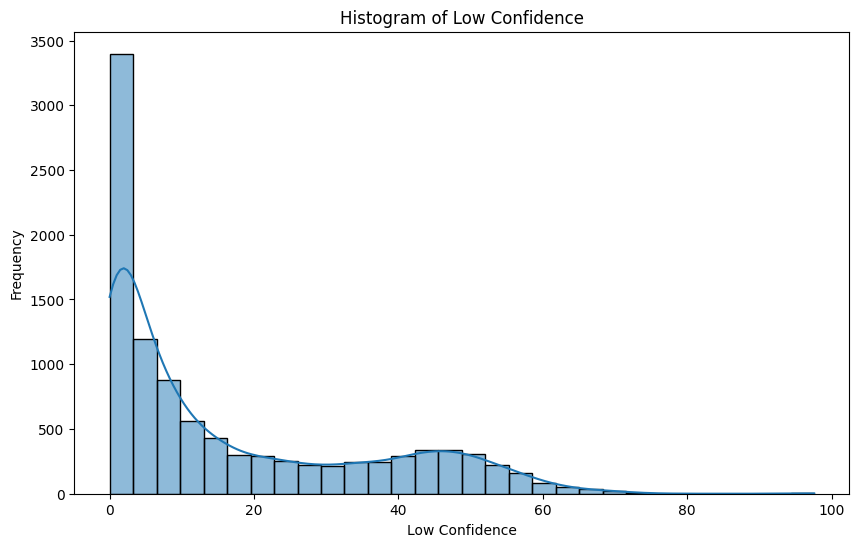

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Low_Confidence_Limit'], bins=30, edgecolor='black', kde = True)
plt.xlabel('Low Confidence')
plt.ylabel('Frequency')
plt.title('Histogram of Low Confidence')
plt.show()

**Examining the distribution of 'Low_Confidence_Limit' using a histogram to inform the imputation of missing values.**

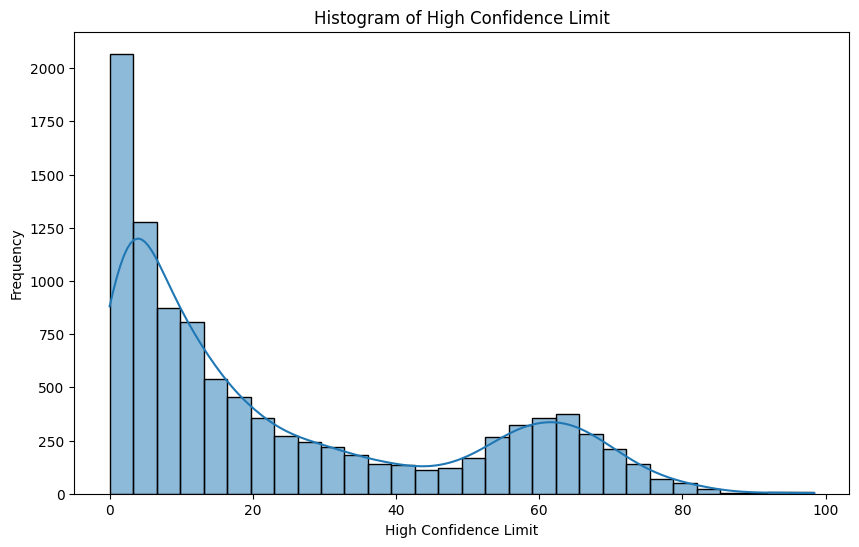

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data['High_Confidence_Limit'], bins=30, edgecolor='black' , kde = True)
plt.xlabel('High Confidence Limit')
plt.ylabel('Frequency')
plt.title('Histogram of High Confidence Limit')
plt.show()

**Examining the distribution of 'High_Confidence_Limit' using a histogram to inform the imputation of missing values.**

In [33]:
data['Low_Confidence_Limit'].fillna(data['Low_Confidence_Limit'].median() , inplace=True)
data['High_Confidence_Limit'].fillna(data['High_Confidence_Limit'].median() , inplace=True)

<ipython-input-33-84164a328ebd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Low_Confidence_Limit'].fillna(data['Low_Confidence_Limit'].median() , inplace=True)
<ipython-input-33-84164a328ebd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

**To address the skewness in the 'Low_Confidence_Limit' and 'High_Confidence_Limit' distributions, missing values were imputed with their respective medians, which is more suitable for skewed data than the mean.**

In [34]:
print(data['Response'].value_counts())
null_count = data['Response'].isnull().sum()
print(null_count)

Response
Ever              2730
Frequent          2730
Current           2730
Want to Quit      1284
Tried to Quiet    1126
Name: count, dtype: int64
0


In [35]:
data.head(15)

,YEAR,LocationDesc,TopicDesc,Response,Low_Confidence_Limit,High_Confidence_Limit,Gender,Education,GeoLocation,Gen-Edu
0,2004,Ohio,Cigarette Use (Youth),Ever,25.8,38.5,Overall,Middle School,"(40.060210141, -82.404260056)",Overall-1EDU
1,2008,Alabama,Cigarette Use (Youth),Ever,42.1,53.5,Female,High School,"(32.840571122, -86.631860762)",Female-2EDU
2,2015,West Virginia,Smokeless Tobacco Use (Youth),Frequent,9.0,16.4,Male,High School,"(38.665510202, -80.712640135)",Male-2EDU
3,2005,Illinois,Cigarette Use (Youth),Ever,24.2,32.8,Overall,Middle School,"(40.485010283, -88.997710178)",Overall-1EDU
4,2005,Connecticut,Smokeless Tobacco Use (Youth),Ever,16.0,25.1,Male,High School,"(41.56266102, -72.649840952)",Male-2EDU
5,2009,Connecticut,Smokeless Tobacco Use (Youth),Frequent,0.6,1.8,Overall,High School,"(41.56266102, -72.649840952)",Overall-2EDU
6,2001,Idaho,Smokeless Tobacco Use (Youth),Ever,12.7,17.6,Male,Middle School,"(43.682630005, -114.363730042)",Male-1EDU
7,2004,Vermont,Cigarette Use (Youth),Frequent,1.3,3.8,Male,Middle School,"(43.625381239, -72.517640791)",Male-1EDU
8,2007,Connecticut,Cigarette Use (Youth),Ever,9.6,16.4,Overall,Middle School,"(41.56266102, -72.649840952)",Overall-1EDU
9,2006,Pennsylvania,Cigarette Use (Youth),Ever,37.3,47.5,Female,High School,"(40.793730152, -77.860700294)",Female-2EDU


**To gain deeper insights, the 'geolocation' column was analyzed to extract key information such as rehabilitation centers(LocationDesc)further analysis**

In [36]:
null_data1 = data[data['GeoLocation'].isnull()]
null_data1

,YEAR,LocationDesc,TopicDesc,Response,Low_Confidence_Limit,High_Confidence_Limit,Gender,Education,GeoLocation,Gen-Edu
9198,2015,National (States and DC),Cessation (Youth),Tried to Quiet,71.0,83.0,Overall,Middle School,NaN,Overall-1EDU
9558,2015,National (States and DC),Cessation (Youth),Tried to Quiet,53.0,62.6,Overall,High School,NaN,Overall-2EDU
9604,2015,National (States and DC),Cessation (Youth),Want to Quit,56.0,65.1,Overall,High School,NaN,Overall-2EDU
9636,2015,National (States and DC),Cessation (Youth),Want to Quit,56.7,73.3,Overall,Middle School,NaN,Overall-1EDU


In [37]:
data.dropna(inplace = True)

In [38]:
data.shape

(10596, 10)

In [39]:
print("Missing values in each column:\n" ,data.isnull().sum())

Missing values in each column:
 YEAR                     0
LocationDesc             0
TopicDesc                0
Response                 0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Gender                   0
Education                0
GeoLocation              0
Gen-Edu                  0
dtype: int64


In [40]:
data.head(10)

,YEAR,LocationDesc,TopicDesc,Response,Low_Confidence_Limit,High_Confidence_Limit,Gender,Education,GeoLocation,Gen-Edu
0,2004,Ohio,Cigarette Use (Youth),Ever,25.8,38.5,Overall,Middle School,"(40.060210141, -82.404260056)",Overall-1EDU
1,2008,Alabama,Cigarette Use (Youth),Ever,42.1,53.5,Female,High School,"(32.840571122, -86.631860762)",Female-2EDU
2,2015,West Virginia,Smokeless Tobacco Use (Youth),Frequent,9.0,16.4,Male,High School,"(38.665510202, -80.712640135)",Male-2EDU
3,2005,Illinois,Cigarette Use (Youth),Ever,24.2,32.8,Overall,Middle School,"(40.485010283, -88.997710178)",Overall-1EDU
4,2005,Connecticut,Smokeless Tobacco Use (Youth),Ever,16.0,25.1,Male,High School,"(41.56266102, -72.649840952)",Male-2EDU
5,2009,Connecticut,Smokeless Tobacco Use (Youth),Frequent,0.6,1.8,Overall,High School,"(41.56266102, -72.649840952)",Overall-2EDU
6,2001,Idaho,Smokeless Tobacco Use (Youth),Ever,12.7,17.6,Male,Middle School,"(43.682630005, -114.363730042)",Male-1EDU
7,2004,Vermont,Cigarette Use (Youth),Frequent,1.3,3.8,Male,Middle School,"(43.625381239, -72.517640791)",Male-1EDU
8,2007,Connecticut,Cigarette Use (Youth),Ever,9.6,16.4,Overall,Middle School,"(41.56266102, -72.649840952)",Overall-1EDU
9,2006,Pennsylvania,Cigarette Use (Youth),Ever,37.3,47.5,Female,High School,"(40.793730152, -77.860700294)",Female-2EDU


In [41]:
cessastion = data[data['TopicDesc'] == 'Cessation (Youth)' ]
cessastion.head(5)

,YEAR,LocationDesc,TopicDesc,Response,Low_Confidence_Limit,High_Confidence_Limit,Gender,Education,GeoLocation,Gen-Edu
10,2015,Louisiana,Cessation (Youth),Tried to Quiet,56.0,94.6,Overall,Middle School,"(31.312660644, -92.445680071)",Overall-1EDU
15,2008,Minnesota,Cessation (Youth),Want to Quit,7.9,13.2,Female,Middle School,"(46.355648736, -94.794200503)",Female-1EDU
19,2011,New Hampshire,Cessation (Youth),Want to Quit,33.4,49.0,Overall,High School,"(43.655950113, -71.50036092)",Overall-2EDU
21,2005,Illinois,Cessation (Youth),Tried to Quiet,40.3,50.7,Male,High School,"(40.485010283, -88.997710178)",Male-2EDU
25,2001,Georgia,Cessation (Youth),Tried to Quiet,41.3,64.1,Female,Middle School,"(32.839681093, -83.627580346)",Female-1EDU


In [42]:
cessastion['Response'].value_counts()

,count
Response,
Want to Quit,1282
Tried to Quiet,1124


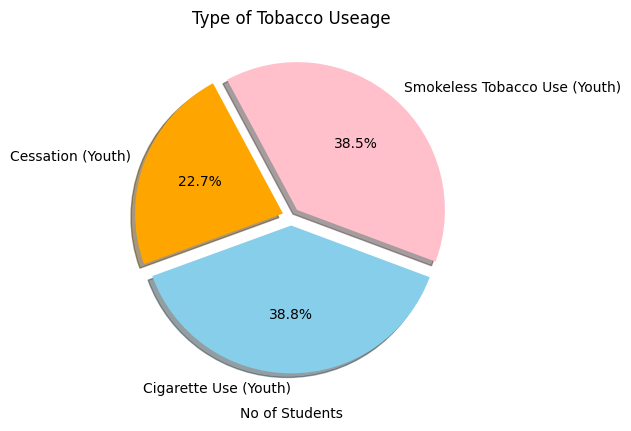

,TopicDesc,count
0,Cigarette Use (Youth),4107
1,Smokeless Tobacco Use (Youth),4083
2,Cessation (Youth),2406


In [43]:
Prevalence = data['TopicDesc'].value_counts().reset_index()
values = Prevalence['count']
labels = Prevalence['TopicDesc']
colors1 = [ 'skyblue' , 'pink' ,'orange' ]
explode = [0]*len(Prevalence)
for i in range(len(explode)):
  explode[i] = 0.06
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=200, shadow=True , colors = colors1 , explode = explode)
plt.xlabel("No of Students")
plt.ylabel(" ")
plt.title("Type of Tobacco Useage")
plt.show()
Prevalence

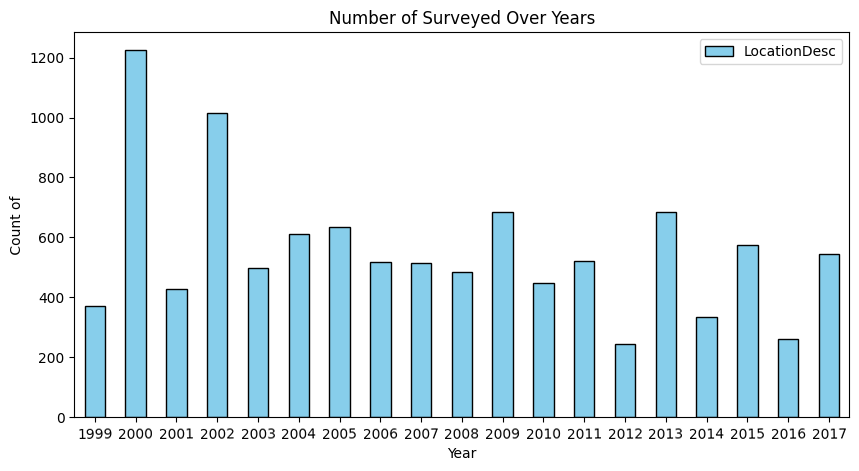

In [44]:
grouped = data.groupby(['YEAR'])['LocationDesc'].count().reset_index()
grouped.plot(kind='bar', x='YEAR', y='LocationDesc', color='skyblue', edgecolor='black', figsize=(10, 5))
plt.xticks(rotation=True)
plt.title("Number of Surveyed Over Years")
plt.xlabel("Year")
plt.ylabel(" Count of ")
plt.show()

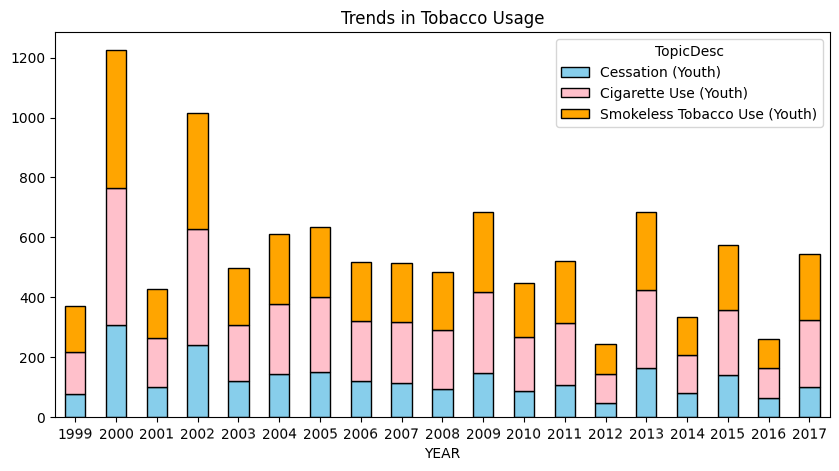

In [45]:
grouped_prevalence = data.groupby(['YEAR' , 'TopicDesc'])['LocationDesc'].count().reset_index()
grouped_prevalence = grouped_prevalence.pivot(index = 'YEAR' , columns= 'TopicDesc' ,values = 'LocationDesc')
color = {'Cessation (Youth)' : 'skyblue' , 'Cigarette Use (Youth)' : 'pink' , 'Smokeless Tobacco Use (Youth)' : 'orange'}
grouped_prevalence.plot(kind = 'bar' , stacked = True , color = color , edgecolor = 'black' ,  figsize = (10,5))
plt.xticks(rotation = True)
plt.title("Trends in Tobacco Usage")
plt.show()

**A stacked bar chart was utilized to visualize trends in tobacco use prevalence across different survey years. By stacking the proportions of cigarette, smokeless tobacco, and e-cigarette use within each survey year, the chart allows for easy identification of changes in the relative prevalence of each tobacco product over time.**

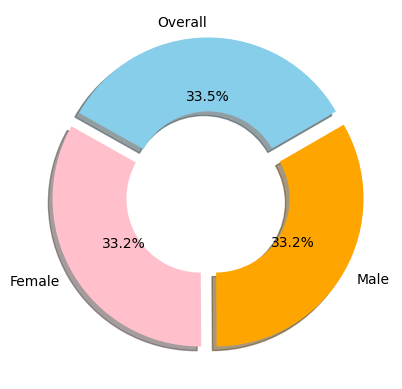

,Gender,count
0,Overall,3552
1,Female,3522
2,Male,3522


In [46]:
gender = data['Gender'].value_counts().reset_index()
gender1 = gender['Gender']
gender2 = gender['count']
colors2 = [ 'skyblue' ,  'pink' ,  'orange']
explode1 = [0]*len(gender)
for i in range(len(explode1)):
  explode1[i] = 0.06
plt.pie(gender2 , labels = gender1  ,  autopct='%1.1f%%', startangle= 30 , colors = colors2 ,explode = explode1 ,  wedgeprops=dict(width=0.5) , shadow = True)
plt.show()
gender

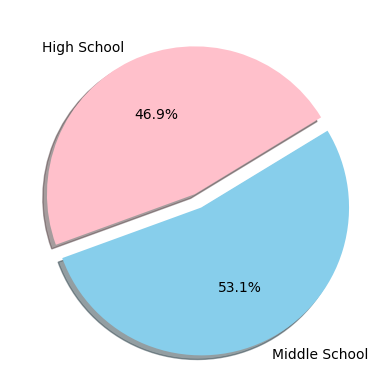

,Education,count
0,Middle School,5631
1,High School,4965


In [47]:
education = data['Education'].value_counts().reset_index()
educa = education['Education']
edu = education['count']
explode2 = [0] * len(education)
explode2[0] = 0.1
colors2 = ['skyblue' , 'pink']
plt.pie(edu , labels = educa , autopct='%1.1f%%', startangle=200, shadow=True , colors = colors2 , explode = explode2 )
plt.show()
education

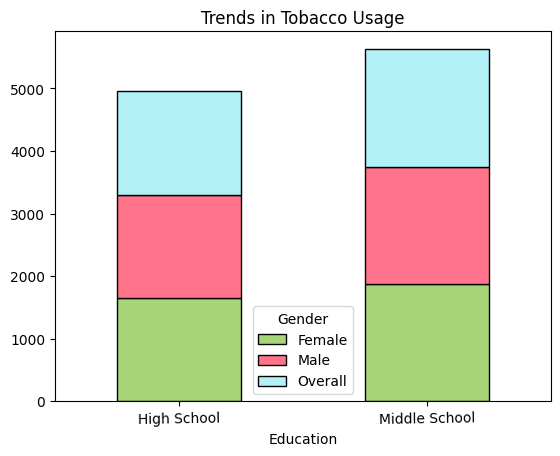

Gender,Female,Male,Overall
Education,,,
High School,1650,1650,1665
Middle School,1872,1872,1887


In [48]:
education_gender = data.groupby(['Education' , 'Gender'])['TopicDesc'].count().reset_index()
education_gender = education_gender.pivot(index = 'Education' , columns = 'Gender' , values = 'TopicDesc')
colors4 = {'Female' : '#A7D477' , 'Male' : '#FF748B' , 'Overall' : '#B1F0F7'}
#color3 = {'Female' : 'skyblue' , 'Male' : 'pink' , 'Overall' : 'lightgreen'}
education_gender.plot(kind = 'bar' , stacked = True , color = colors4 , edgecolor = 'black')
plt.xticks(rotation = True)
plt.title("Trends in Tobacco Usage")
plt.show()
education_gender

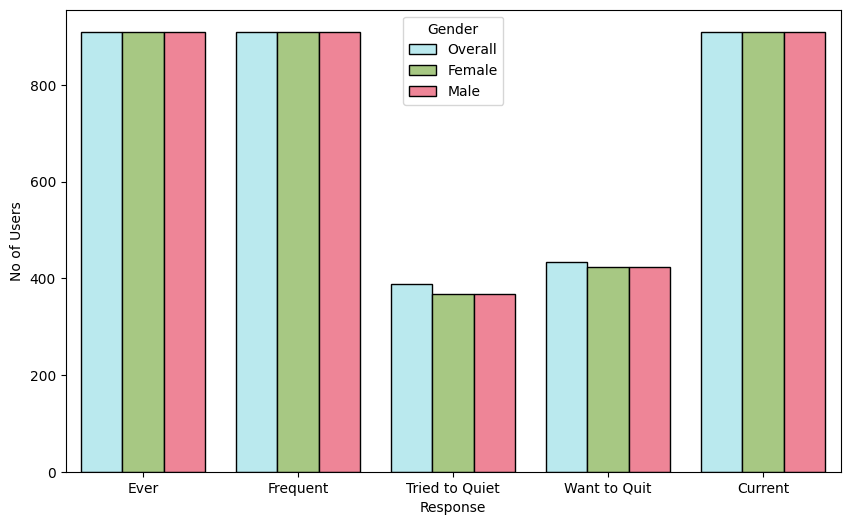

Gender,Female,Male,Overall
Response,,,
Current,455.0,455.0,455.0
Ever,455.0,455.0,455.0
Frequent,455.0,455.0,455.0
Tried to Quiet,368.0,368.0,388.0
Want to Quit,424.0,424.0,434.0


In [49]:
prevalance = data.groupby([ 'Response' , 'TopicDesc' , 'Gender' ])['LocationDesc'].count().reset_index()
prevalance = prevalance.pivot_table(index = 'Response' , columns = "Gender" , values = 'LocationDesc')
plt.figure(figsize=(10, 6))
sns.countplot( data = data , x = 'Response', hue = 'Gender' , palette = colors4 , edgecolor = 'black' )
plt.xticks(rotation = 0)
plt.ylabel('No of Users')
plt.show()
prevalance

<Figure size 5000x4000 with 0 Axes>

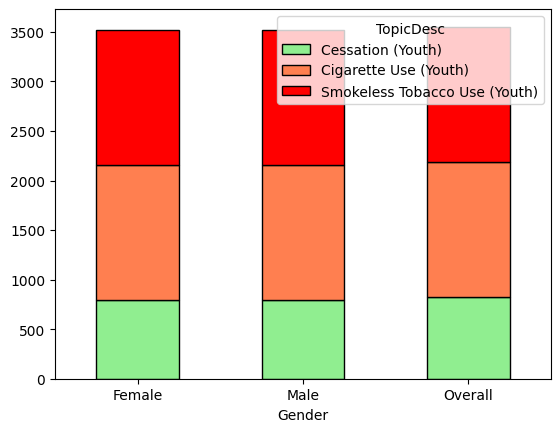

TopicDesc,Cessation (Youth),Cigarette Use (Youth),Smokeless Tobacco Use (Youth)
Gender,,,
Female,792,1369,1361
Male,792,1369,1361
Overall,822,1369,1361


In [50]:
prevalance1 = data.groupby([ 'TopicDesc' , 'Gender' ])['LocationDesc'].count().reset_index()
prevalance1 = prevalance1.pivot_table(index = 'Gender' , columns = "TopicDesc" , values = 'LocationDesc' , aggfunc='first')
plt.figure(figsize=(50, 40))
colors2 = { 'Cessation (Youth)' : 'lightgreen' , 'Smokeless Tobacco Use (Youth)' : 'red' , 'Cigarette Use (Youth)' : 'coral'}
prevalance1.plot(kind = 'bar' , stacked = True , color = colors2 , edgecolor = 'black' )
plt.xticks(rotation = 0)
plt.show()
prevalance1

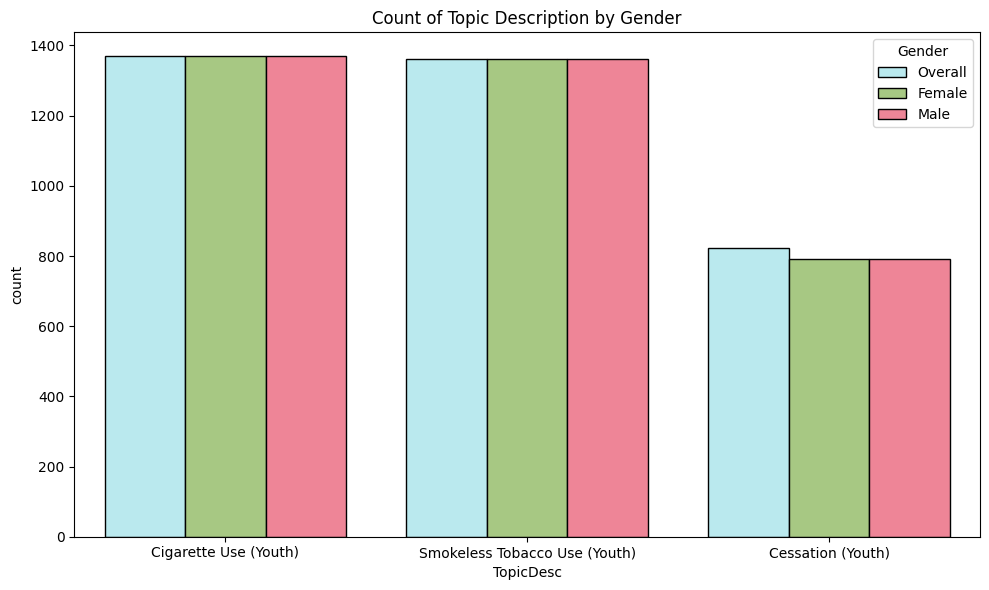

TopicDesc,Cessation (Youth),Cigarette Use (Youth),Smokeless Tobacco Use (Youth)
Gender,,,
Female,792,1369,1361
Male,792,1369,1361
Overall,822,1369,1361


In [51]:
prevalance1 = data.groupby(['TopicDesc', 'Gender'])['LocationDesc'].count().reset_index()
prevalance1 = prevalance1.pivot_table(index='Gender', columns="TopicDesc", values='LocationDesc', aggfunc='first')
plt.figure(figsize=(10, 6))
sns.countplot(x='TopicDesc', hue='Gender', data=data, palette=colors4 , edgecolor = 'black' )
plt.xticks(rotation=0)
plt.title('Count of Topic Description by Gender')
plt.tight_layout()
plt.show()

prevalance1